### X-ray 분류 모형-Female

In [1]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  
print(gpus)  

if gpus:  
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import glob
from PIL import Image
import numpy as np
import glob

all_images=[]
all_labels=[]
filenames=[]
ages=[]

img_size=(80,100)

for f in glob.glob('c:\\workspace3\\data\\images\\xray\\**\\*.jpg', recursive=True):
    arr=f.split('\\')
    arr2=arr[5].split("_")
    if arr2[1]=='F':
        img = Image.open(f)
        filenames.append(arr[-1])
        img_resize = img.resize((img_size[0], img_size[1]))
        all_images.append(img_resize)
        age=int(arr2[2].replace('yr',''))
        ages.append(age)

In [3]:
filenames[:10]

['310_F.jpg',
 '311_F.jpg',
 '312_F.jpg',
 '313_F.jpg',
 '314_F.jpg',
 '315_F.jpg',
 '316_F.jpg',
 '317_F.jpg',
 '318_F.jpg',
 '319_F.jpg']

In [4]:
items=list(zip(filenames,ages,all_images))
items[:10]

[('310_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('311_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('312_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('313_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('314_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('315_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('316_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('317_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('318_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('319_F.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>)]

In [5]:
len(all_images)

572

In [6]:
np.array(all_images[0]).shape

(100, 80, 3)

In [7]:
X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:
    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))

X.shape

(573, 80, 100, 3)

In [8]:
X = np.delete(X, (0), axis=0)

In [9]:
X.shape  

(572, 80, 100, 3)

In [10]:
y=np.array(ages)
y[:10]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

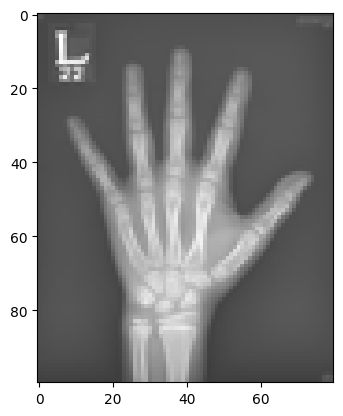

In [11]:
import matplotlib.pyplot as plt

plt.imshow(all_images[0])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True,  random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((457, 80, 100, 3), (115, 80, 100, 3), (457,), (115,))

In [13]:
import pandas as pd

pd.DataFrame(y_train).value_counts()

5     49
6     40
8     40
9     40
10    40
11    40
12    40
7     37
13    36
14    29
4     26
3     15
15    15
16    10
Name: count, dtype: int64

In [14]:
X_train=X_train.reshape(-1,img_size[0]*img_size[1]*3)
X_test=X_test.reshape(-1,img_size[0]*img_size[1]*3)

In [15]:
X_train=X_train/255.
X_test=X_test/255.

In [16]:
X_train=X_train.reshape(-1,img_size[0],img_size[1],3)
X_test=X_test.reshape(-1,img_size[0],img_size[1],3)

In [17]:
from tensorflow.keras import utils

y_train_backup=y_train
y_test_backup=y_test

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

model=Sequential()

model.add(Conv2D(64,(3,3),padding="same", input_shape=X_train.shape[1:],activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dense(1))          

model.compile(optimizer="rmsprop", loss="mae",metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 100, 64)       1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 48, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 23936)             0

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((457, 80, 100, 3), (457,), (115, 80, 100, 3), (115,))

In [20]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("c:/data/model/xray_f_best.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=30, callbacks=[checkpoint])

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 6.3224 - mae: 6.3224
Epoch 1: val_loss improved from inf to 3.39190, saving model to c:/data/model\xray_f_best.h5
12/12 [==============================] - 3s 82ms/step - loss: 6.3224 - mae: 6.3224 - val_loss: 3.3919 - val_mae: 3.3919
Epoch 2/30
11/12 [==========================>...] - ETA: 0s - loss: 3.2517 - mae: 3.2517
Epoch 2: val_loss improved from 3.39190 to 2.86877, saving model to c:/data/model\xray_f_best.h5
12/12 [==============================] - 1s 70ms/step - loss: 3.2496 - mae: 3.2496 - val_loss: 2.8688 - val_mae: 2.8688
Epoch 3/30
11/12 [==========================>...] - ETA: 0s - loss: 3.6675 - mae: 3.6675
Epoch 3: val_loss did not improve from 2.86877
12/12 [==============================] - 0s 35ms/step - loss: 3.6282 - mae: 3.6282 - val_loss: 4.2271 - val_mae: 4.2271
Epoch 4/30
11/12 [==========================>...] - ETA: 0s - loss: 3.1600 - mae: 3.1600
Epoch 4: val_loss did not improve from 2.86877


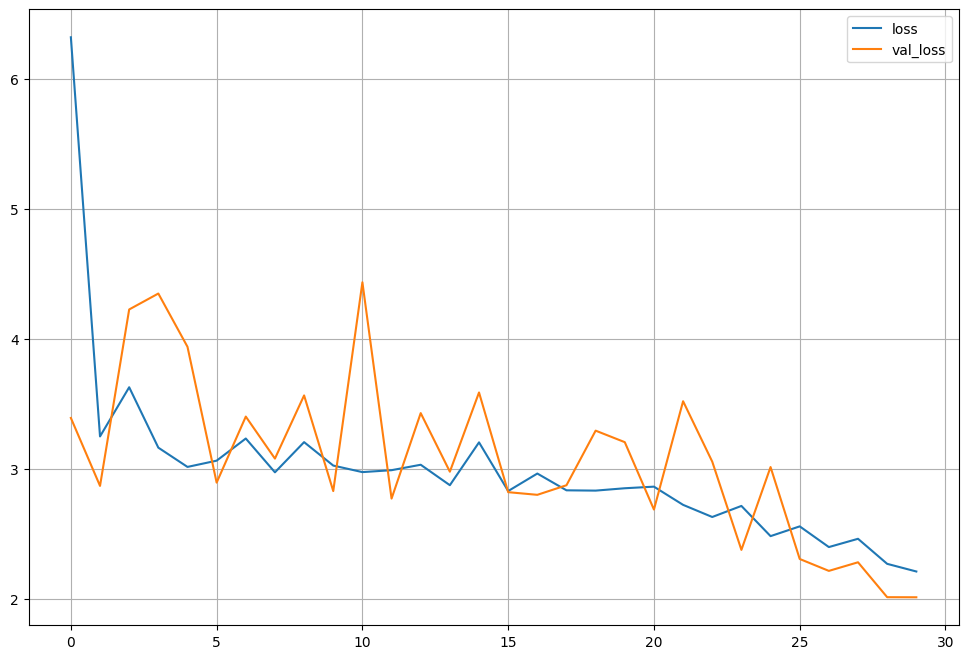

In [21]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()

plt.show()

In [22]:
from tensorflow.keras.models import load_model

model = load_model('c:/data/model/xray_f_best.h5')
scores = model.evaluate(X_train, y_train, verbose=1)
print(scores)

15/15 [==============================] - 0s 15ms/step - loss: 1.8574 - mae: 1.8574
[1.85735023021698, 1.85735023021698]


In [23]:
model = load_model('c:/data/model/xray_f_best.h5')

scores = model.evaluate(X_test, y_test, verbose=1)
print(scores)

4/4 [==============================] - 0s 40ms/step - loss: 1.9779 - mae: 1.9779
[1.9779115915298462, 1.9779115915298462]


In [24]:
pred=model.predict(X_test)
pred[:5]

4/4 [==============================] - 0s 8ms/step


array([[ 5.267589 ],
       [ 3.9513037],
       [10.53421  ],
       [ 8.959951 ],
       [ 9.349514 ]], dtype=float32)

In [25]:
y_test[:5]

array([ 5,  4, 15, 13, 10])